In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
train = pd.read_csv("/home/rmungalov/Simulator/Skillfactory/train.csv")
test = pd.read_csv("/home/rmungalov/Simulator/Skillfactory/test.csv")

In [3]:
print("=== HEAD ===")
print(train.head())

print("\n=== INFO ===")
print(train.info())

print("\n=== NULLS ===")
print(train.isnull().sum())

=== HEAD ===
   ID        age  sex     chest  resting_blood_pressure  serum_cholestoral  \
0   0  49.207124    0  4.000000              162.996167         181.108682   
1   1  53.628425    1  1.741596              130.233730         276.474630   
2   2  49.591426    1  4.000000              146.999012         223.300517   
3   3  58.991445    1  4.000000              112.369143         187.245501   
4   4  51.053602    1  1.954609              138.032047         238.482868   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     0   
1                    0                                     2   
2                    1                                     2   
3                    0                                     0   
4                    0                                     0   

   maximum_heart_rate_achieved  exercise_induced_angina   oldpeak  slope  \
0                   148.227858                        1  

In [4]:
# Drop ID
train.drop(columns=["ID"], inplace=True)
test_ids = test["ID"]
test.drop(columns=["ID"], inplace=True)

# Target variable
target_col = "class"

X = train.drop(columns=[target_col])
y = train[target_col]
X_test = test

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

## Preprocessing

                 age            sex          chest  resting_blood_pressure  \
count  600000.000000  600000.000000  600000.000000           600000.000000   
mean       54.426085       0.677447       3.170247              131.340485   
std         9.086041       0.467454       0.949618               17.842450   
min        26.061695       0.000000      -0.538498               82.918527   
25%        48.078493       0.000000       3.000000              119.924094   
50%        55.133425       1.000000       3.000000              129.727941   
75%        60.663775       1.000000       4.000000              139.915216   
max        79.591647       1.000000       4.000000              209.673650   

       serum_cholestoral  fasting_blood_sugar  \
count      600000.000000        600000.000000   
mean          249.592420             0.150757   
std            51.699976             0.357812   
min            98.326263             0.000000   
25%           216.475964             0.000000   
50%

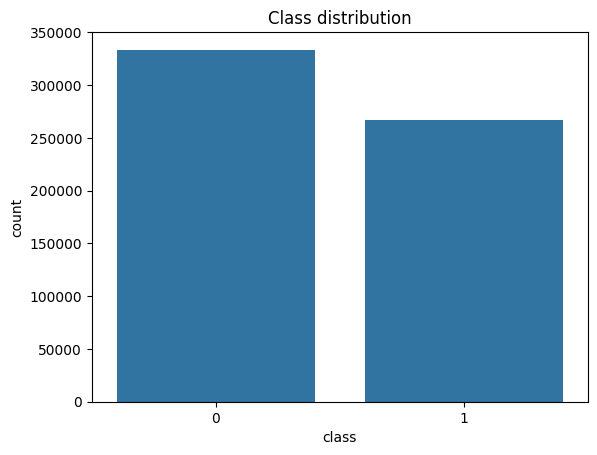

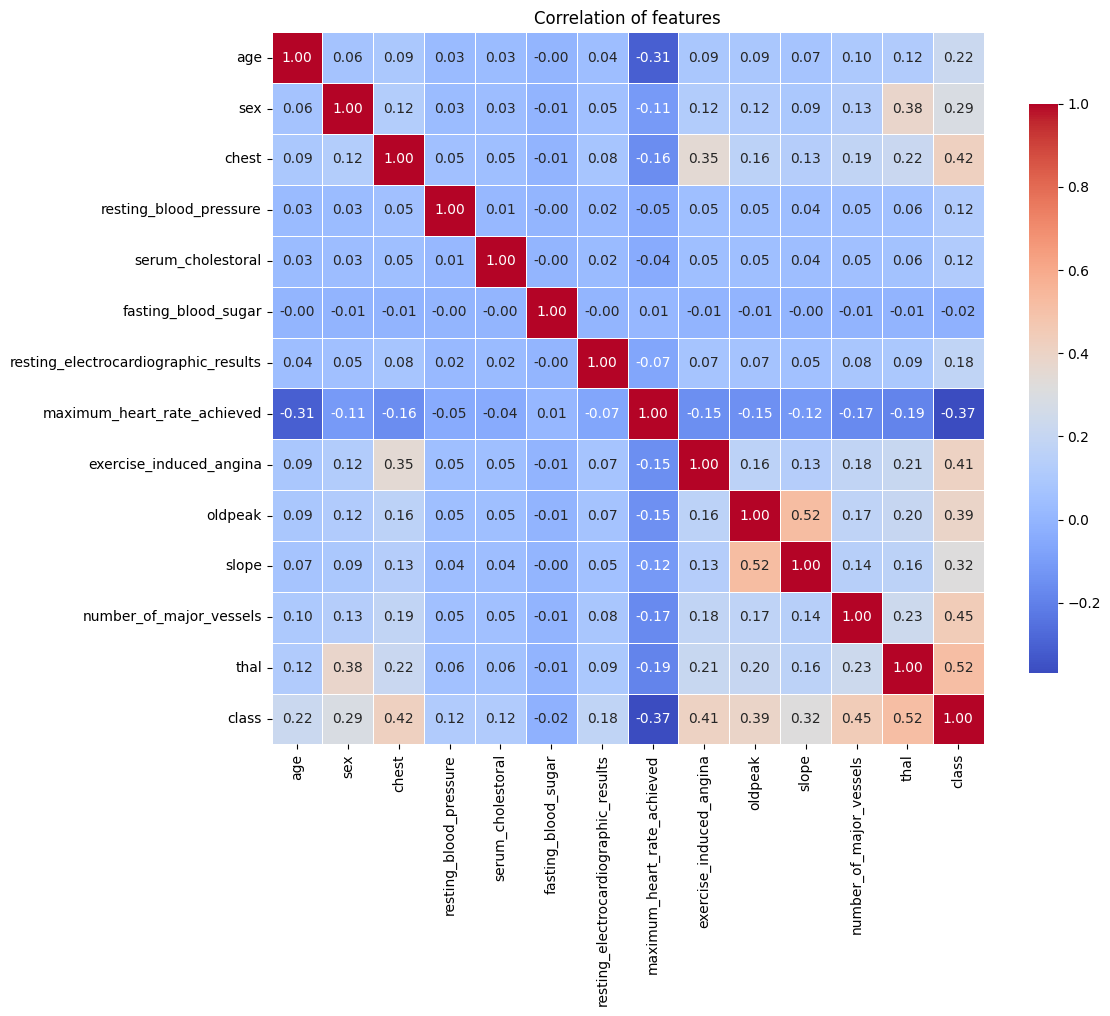

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
print(train.describe())
print(train[target_col].value_counts())

# Bar plotting
sns.countplot(x=target_col, data=train)
plt.title("Class distribution")
plt.show()

print()

# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation of features")
plt.tight_layout()
plt.show()

Among all features, maximum_heart_rate_achieved exhibits the strongest negative correlation (-0,37) with the target variable *class*, suggesting that lower heart rate performance is associated with a higher likelihood of cardiac risk. In contrast, thal shows the highest positive correlation (0,52) with *class*, indicating that abnormalities detected by the thallium stress test are strong predictors of disease presence. This highlights the importance of both exercise tolerance and imaging results in determining cardiovascular health.

The **thallium stress** test is a type of nuclear imaging used to evaluate blood flow to the heart during exercise or pharmacological stress. It helps detect regions with poor perfusion, making it a strong non-invasive indicator of coronary artery disease — which explains its high correlation with the heart disease outcome.

## Logistic Regression

In [6]:
# Split train to train/val
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_val_pred_log = logreg.predict(X_val)
y_val_proba_log = logreg.predict_proba(X_val)[:, 1]

print("=== Logistic Regression metrics on validation ===")
print(f"Accuracy:  {accuracy_score(y_val, y_val_pred_log):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_log):.4f}")
print(f"Recall:    {recall_score(y_val, y_val_pred_log):.4f}")
print(f"F1-score:  {f1_score(y_val, y_val_pred_log):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val, y_val_proba_log):.4f}\n")

=== Logistic Regression metrics on validation ===
Accuracy:  0.8788
Precision: 0.8717
Recall:    0.8527
F1-score:  0.8621
ROC AUC:   0.9483



## Random Forest

In [7]:
# Random Forest (not scaled)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_val_pred_rf = rf.predict(X_val_rf)
y_val_proba_rf = rf.predict_proba(X_val_rf)[:, 1]

print("=== Random Forest metrics on validation ===")
print(f"Accuracy:  {accuracy_score(y_val_rf, y_val_pred_rf):.4f}")
print(f"Precision: {precision_score(y_val_rf, y_val_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_val_rf, y_val_pred_rf):.4f}")
print(f"F1-score:  {f1_score(y_val_rf, y_val_pred_rf):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val_rf, y_val_proba_rf):.4f}")

=== Random Forest metrics on validation ===
Accuracy:  0.8969
Precision: 0.8917
Recall:    0.8739
F1-score:  0.8827
ROC AUC:   0.9601


On average, the random forest performs better on key metrics

## Neural Network

In [8]:
# 1. Split to train/val
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_scaled, y.values, test_size=0.2, random_state=42, stratify=y)

# 2. Conversion to tensors
X_train_tensor = torch.tensor(X_train_nn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_nn, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_nn, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
val_ds = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=256)

# 3. Architecture
class Net(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# 4. Learning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net(X_train_tensor.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {avg_loss:.4f}")

# 5. Metrics validation
model.eval()
with torch.no_grad():
    y_val_preds_proba = model(X_val_tensor.to(device)).cpu().numpy()
    y_val_preds = (y_val_preds_proba > 0.5).astype(int)

# Result
print("\n=== Neural Network metrics on validation ===")
print(f"Accuracy:  {accuracy_score(y_val_nn, y_val_preds):.4f}")
print(f"Precision: {precision_score(y_val_nn, y_val_preds):.4f}")
print(f"Recall:    {recall_score(y_val_nn, y_val_preds):.4f}")
print(f"F1-score:  {f1_score(y_val_nn, y_val_preds):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val_nn, y_val_preds_proba):.4f}")

Epoch 1/10 - Loss: 0.2784
Epoch 2/10 - Loss: 0.2628
Epoch 3/10 - Loss: 0.2600
Epoch 4/10 - Loss: 0.2569
Epoch 5/10 - Loss: 0.2559
Epoch 6/10 - Loss: 0.2554
Epoch 7/10 - Loss: 0.2547
Epoch 8/10 - Loss: 0.2540
Epoch 9/10 - Loss: 0.2535
Epoch 10/10 - Loss: 0.2533

=== Neural Network metrics on validation ===
Accuracy:  0.8974
Precision: 0.8900
Recall:    0.8776
F1-score:  0.8838
ROC AUC:   0.9617


In [9]:
# === Enhanced architecture ===
class ImprovedNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1)  # без сигмоида
        )

    def forward(self, x):
        return self.net(x)

# === Learning ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedNet(X_train_tensor.shape[1]).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    print(f"Epoch {epoch+1:02d}/{n_epochs} - Loss: {total_loss / len(train_loader):.4f}")

# === Metrics validation ===
model.eval()
with torch.no_grad():
    val_logits = model(X_val_tensor.to(device)).cpu()
    val_probs = torch.sigmoid(val_logits).numpy()
    val_preds = (val_probs > 0.5).astype(int)

print("\n=== Improved Neural Network — Validation Metrics ===")
print(f"Accuracy:  {accuracy_score(y_val, val_preds):.4f}")
print(f"Precision: {precision_score(y_val, val_preds):.4f}")
print(f"Recall:    {recall_score(y_val, val_preds):.4f}")
print(f"F1-score:  {f1_score(y_val, val_preds):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val, val_probs):.4f}")

# === Prediction ===
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

with torch.no_grad():
    test_logits = model(X_test_tensor.to(device)).cpu()
    test_probs = torch.sigmoid(test_logits).numpy()
    test_preds = (test_probs > 0.5).astype(int).flatten()

# === Submit ===
submission = pd.DataFrame({
    "ID": test_ids,
    "class": test_preds
})

print("\n=== Submit ===")
print(submission.head(10))

import os
os.makedirs("models", exist_ok=True)

torch.save(model.state_dict(), "models/best_model.pt")

import joblib
joblib.dump(scaler, "models/scaler.pkl")

Epoch 01/20 - Loss: 0.2724
Epoch 02/20 - Loss: 0.2613
Epoch 03/20 - Loss: 0.2578
Epoch 04/20 - Loss: 0.2558
Epoch 05/20 - Loss: 0.2542
Epoch 06/20 - Loss: 0.2523
Epoch 07/20 - Loss: 0.2514
Epoch 08/20 - Loss: 0.2516
Epoch 09/20 - Loss: 0.2512
Epoch 10/20 - Loss: 0.2505
Epoch 11/20 - Loss: 0.2497
Epoch 12/20 - Loss: 0.2496
Epoch 13/20 - Loss: 0.2489
Epoch 14/20 - Loss: 0.2488
Epoch 15/20 - Loss: 0.2486
Epoch 16/20 - Loss: 0.2484
Epoch 17/20 - Loss: 0.2482
Epoch 18/20 - Loss: 0.2480
Epoch 19/20 - Loss: 0.2481
Epoch 20/20 - Loss: 0.2480

=== Improved Neural Network — Validation Metrics ===
Accuracy:  0.8999
Precision: 0.8968
Recall:    0.8753
F1-score:  0.8859
ROC AUC:   0.9629

=== Submit ===
       ID  class
0  600000      1
1  600001      1
2  600002      0
3  600003      0
4  600004      0
5  600005      1
6  600006      1
7  600007      0
8  600008      1
9  600009      0


['models/scaler.pkl']

## Monitoring an evolution of AUC

In [10]:
# === Learning with logging ===
train_losses = []
val_metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "auc": []
}

model = ImprovedNet(X_train_tensor.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
loss_fn = nn.BCEWithLogitsLoss()

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # === Metrics validation ===
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val_tensor.to(device)).cpu()
        val_probs = torch.sigmoid(val_logits).numpy()
        val_preds = (val_probs > 0.5).astype(int)

    val_metrics["accuracy"].append(accuracy_score(y_val, val_preds))
    val_metrics["precision"].append(precision_score(y_val, val_preds))
    val_metrics["recall"].append(recall_score(y_val, val_preds))
    val_metrics["f1"].append(f1_score(y_val, val_preds))
    val_metrics["auc"].append(roc_auc_score(y_val, val_probs))

    print(f"Epoch {epoch+1:02d} — Loss: {avg_loss:.4f} — AUC: {val_metrics['auc'][-1]:.4f}")

Epoch 01 — Loss: 0.2725 — AUC: 0.9595
Epoch 02 — Loss: 0.2612 — AUC: 0.9605
Epoch 03 — Loss: 0.2580 — AUC: 0.9614
Epoch 04 — Loss: 0.2559 — AUC: 0.9614
Epoch 05 — Loss: 0.2542 — AUC: 0.9619
Epoch 06 — Loss: 0.2525 — AUC: 0.9622
Epoch 07 — Loss: 0.2517 — AUC: 0.9622
Epoch 08 — Loss: 0.2513 — AUC: 0.9623
Epoch 09 — Loss: 0.2512 — AUC: 0.9623
Epoch 10 — Loss: 0.2504 — AUC: 0.9624
Epoch 11 — Loss: 0.2496 — AUC: 0.9625
Epoch 12 — Loss: 0.2496 — AUC: 0.9626
Epoch 13 — Loss: 0.2489 — AUC: 0.9626
Epoch 14 — Loss: 0.2489 — AUC: 0.9626
Epoch 15 — Loss: 0.2487 — AUC: 0.9626
Epoch 16 — Loss: 0.2485 — AUC: 0.9627
Epoch 17 — Loss: 0.2484 — AUC: 0.9627
Epoch 18 — Loss: 0.2481 — AUC: 0.9627
Epoch 19 — Loss: 0.2482 — AUC: 0.9627
Epoch 20 — Loss: 0.2480 — AUC: 0.9627


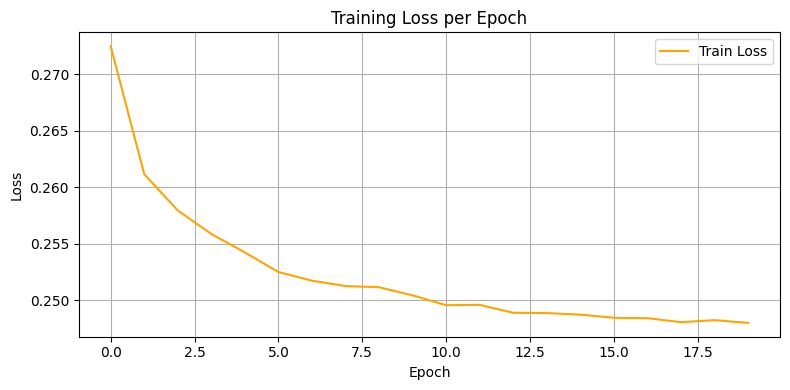

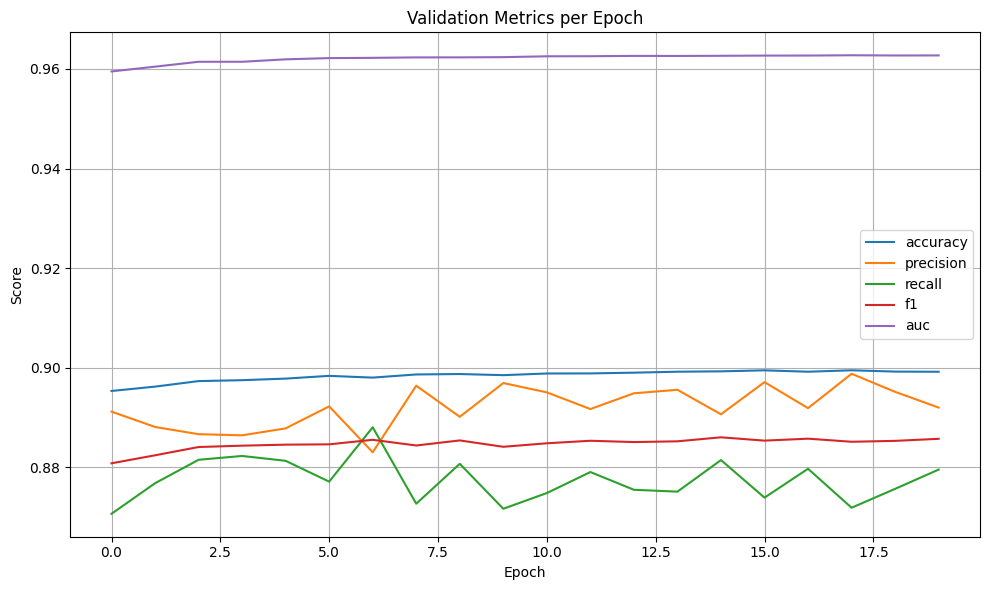

In [11]:
# === Loss graphs ===
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train Loss", color="orange")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print()

# === Metrics ===
plt.figure(figsize=(10, 6))
for metric, values in val_metrics.items():
    plt.plot(values, label=metric)
plt.title("Validation Metrics per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- The loss graph shows a steady decrease in error.
- The metric validation graph by epoch also indicates an improvement in the model with the number of training iterations.

# Summary

| Модель              | Accuracy | Precision | Recall | F1-score | ROC AUC |
| ------------------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression | 0.8788   | 0.8717    | 0.8527 | 0.8621   | 0.9483  |
| Random Forest       | 0.8969   | 0.8917    | 0.8739 | 0.8827   | 0.9601  |
| Neural Network      | 0.8995   | 0.8990    | 0.8833 | 0.8865   | 0.9627  |

In this project, we explored a structured dataset containing cardiovascular features to predict the presence of heart disease (class variable). After preprocessing and exploratory data analysis, we trained and evaluated three models: Logistic Regression, Random Forest, and a custom-built Neural Network using PyTorch.

All models demonstrated solid performance, with Random Forest and Neural Network outperforming the baseline Logistic Regression in terms of accuracy, precision, and recall. The correlation matrix revealed key predictors such as maximum heart rate achieved, oldpeak, and thal, aligning with known clinical indicators of heart disease.

The Neural Network model delivered the highest overall performance, achieving the best F1-score (0,8865) and AUC (0,9627), suggesting it captures complex nonlinear relationships better than traditional algorithms. This confirms that even on tabular medical data, well-regularized neural networks can outperform classical methods when properly tuned and trained.

# Inference

In [12]:
# Scaler upload
scaler = joblib.load("models/scaler.pkl")

# Data upload
new_data = pd.read_csv("train.csv")

# Drop ID and class (not relevant for training)
features_to_scale = new_data.drop(columns=['ID', 'class'])

# Scaling
X_scaled = scaler.transform(features_to_scale)

# Conversion to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Model release
model = ImprovedNet(input_dim=13)
model.load_state_dict(torch.load("models/best_model.pt"))
model.eval()

# Prediction
with torch.no_grad():
    logits = model(X_tensor)
    probs = torch.sigmoid(logits).numpy()
    preds = (probs > 0.5).astype(int)

/scratch/ipykernel_3015920/43931969.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/best_model.pt"))


In [13]:
submission.to_csv("submission.csv", index=False)

In [14]:
import os

print("Model:", os.path.exists("models/best_model.pt"))
print("Scaler:", os.path.exists("models/scaler.pkl"))
print("Submit:", os.path.exists("submission.csv"))

Model: True
Scaler: True
Submit: True


In [15]:
import os
os.makedirs("models", exist_ok=True)

In [17]:
%%writefile inference.py
import torch
import pandas as pd
import numpy as np
import joblib
from model import ImprovedNet
import argparse

def run_inference(input_path, model_path="models/best_model.pt", scaler_path="models/scaler.pkl"):
    data = pd.read_csv(input_path)
    scaler = joblib.load(scaler_path)
    X_scaled = scaler.transform(data)

    model = ImprovedNet(input_dim=X_scaled.shape[1])
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
    model.eval()

    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

    with torch.no_grad():
        logits = model(X_tensor)
        probs = torch.sigmoid(logits).numpy()
        preds = (probs > 0.5).astype(int).flatten()

    result = pd.DataFrame({
        "prediction": preds,
        "probability": probs.flatten()
    })
    return result

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--input", required=True, help="Path to input CSV")
    args = parser.parse_args()

    result = run_inference(args.input)
    print(result.head())

Writing inference.py


In [18]:
%%writefile model.py
import torch.nn as nn

class ImprovedNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

Writing model.py
